In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
conn = sqlite3.connect('data.db')
table1 = "test_table"
table2 = "time_cnt"
cmd = f'''
SELECT "{table1}".run_id,monitor_tag,workers,tasks_per_trial,trial,"{table1}".app_name,average_time FROM "{table1}"
JOIN "{table2}"
ON '{table1}'.run_id = '{table2}'.run_id
'''
tasks = pd.read_sql_query(cmd, conn)
tasks

,run_id,monitor_tag,workers,tasks_per_trial,trial,app_name,average_time
0,bc20c23a-e273-4bbe-aca2-5483278957bd,htex,1,128,1,noop,0.000122
1,301f9c79-b4bb-4afc-855e-8609c0fef61e,htex,1,128,1,sleep10ms,0.000136
2,255d44e9-b0ad-4bbc-bf55-9b1df715b4e7,htex,1,128,1,sleep100ms,0.000091
3,88ea3915-8e22-43ed-9107-e69553b64c60,diaspora,1,128,1,noop,0.178425
4,ccf70684-c335-4f3d-b803-d381712d4af2,diaspora,1,128,1,sleep10ms,0.047718
...,...,...,...,...,...,...,...
475,189c4131-3942-41e2-90ee-a055c8df0649,htex,128,128,10,sleep10ms,0.000089
476,146d2aeb-3b25-452c-8f84-2bae52993ede,htex,128,128,10,sleep100ms,0.000064
477,ba127e43-4f5a-4dfc-a9af-a2f91eb44f88,diaspora,128,128,10,noop,0.000172
478,b47015c9-d65b-45c8-a4d0-d28820d55ccd,diaspora,128,128,10,sleep10ms,0.000199


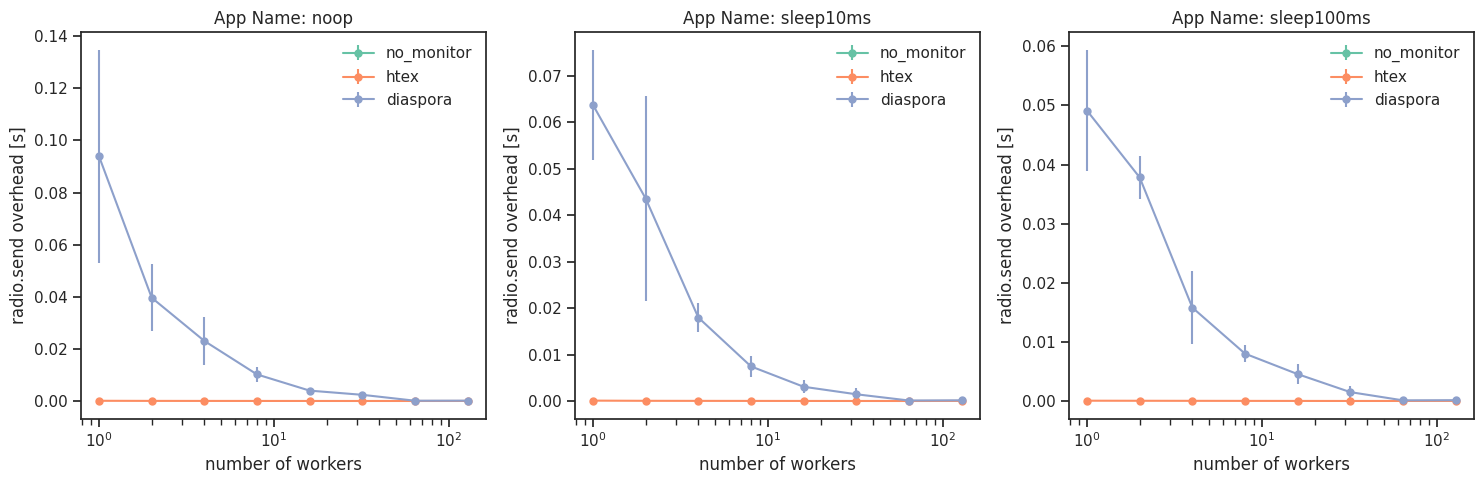

In [3]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['average_time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'average_time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['average_time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('radio.send overhead [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')